<h1>Final Exam DS5230</h1>

<h3>Locally Linear Embedding by Trym Kyvåg</h3>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("hojjatk/mnist-dataset", force_download=True)
print("Dataset re-downloaded to:", path)

100%|██████████| 22.0M/22.0M [00:01<00:00, 17.1MB/s]

Extracting files...


Dataset re-downloaded to: /Users/trymkyvag/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1


In [ ]:
import numpy as np
import idx2numpy
import os

input_path = '/Users/trymkyvag/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1'
training_images_filepath = os.path.join(input_path, 'train-images.idx3-ubyte')
training_labels_filepath = os.path.join(input_path, 'train-labels.idx1-ubyte')
print("Training images path:", training_images_filepath)
print("Training labels path:", training_labels_filepath)
train_images = idx2numpy.convert_from_file(training_images_filepath)
train_labels = idx2numpy.convert_from_file(training_labels_filepath)

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
train_images_flat = train_images.reshape(train_images.shape[0], -1)

Training images path: /Users/trymkyvag/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/train-images.idx3-ubyte
Training labels path: /Users/trymkyvag/.cache/kagglehub/datasets/hojjatk/mnist-dataset/versions/1/train-labels.idx1-ubyte
Training images shape: (60000, 28, 28)
Training labels shape: (60000,)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

print(f"Flattened images shape: {train_images_flat.shape}")

Flattened images shape: (60000, 784)


<h1>Currently 784-dimensionla vector!</h1>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding

subset_indices = np.where((train_labels == 7) | (train_labels == 8))[0]
subset_images = train_images_flat[subset_indices]
subset_labels = train_labels[subset_indices]
n_neighbors = 10
n_components = 2


lle = LocallyLinearEmbedding(
    n_neighbors=n_neighbors, n_components=n_components)
lle_embedding = lle.fit_transform(subset_images)


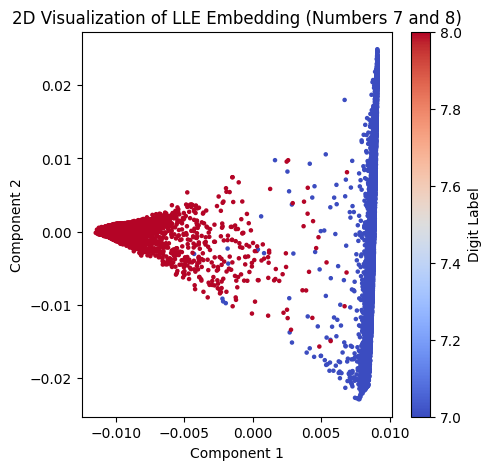

In [ ]:


plt.figure(figsize=(5, 5))
plt.scatter(lle_embedding[:, 0], lle_embedding[:, 1],
            c=subset_labels, cmap='coolwarm', s=5)
plt.title("2D Visualization of LLE Embedding (Numbers 7 and 8)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='Digit Label')  
plt.show()

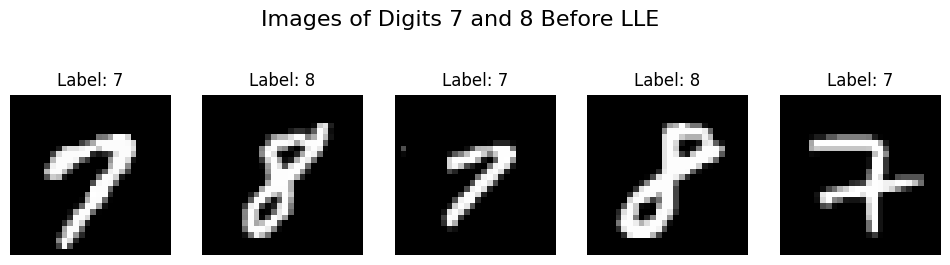

In [ ]:
subset_indices = np.where((train_labels == 7) | (train_labels == 8))[0]
subset_images = train_images[subset_indices]
subset_labels = train_labels[subset_indices]
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(subset_images[i], cmap='gray')
    plt.title(f"Label: {subset_labels[i]}")
    plt.axis('off')  

plt.suptitle("Images of Digits 7 and 8 Before LLE", fontsize=16)
plt.show()